In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

df = pd.read_csv("benchmark_old.csv")
df.head()


#%matplotlib inline

,method,DAG_size,diff,roundTrips,bandwidth,codedSymbolPerRoundTrip
0,RIBLT,100,0.01,1,2,1
1,Traditional,100,0.01,1,1,-1
2,RIBLT,500,0.01,7,8339,1
3,Traditional,500,0.01,4,4,-1
4,RIBLT,1000,0.01,15,18005,1


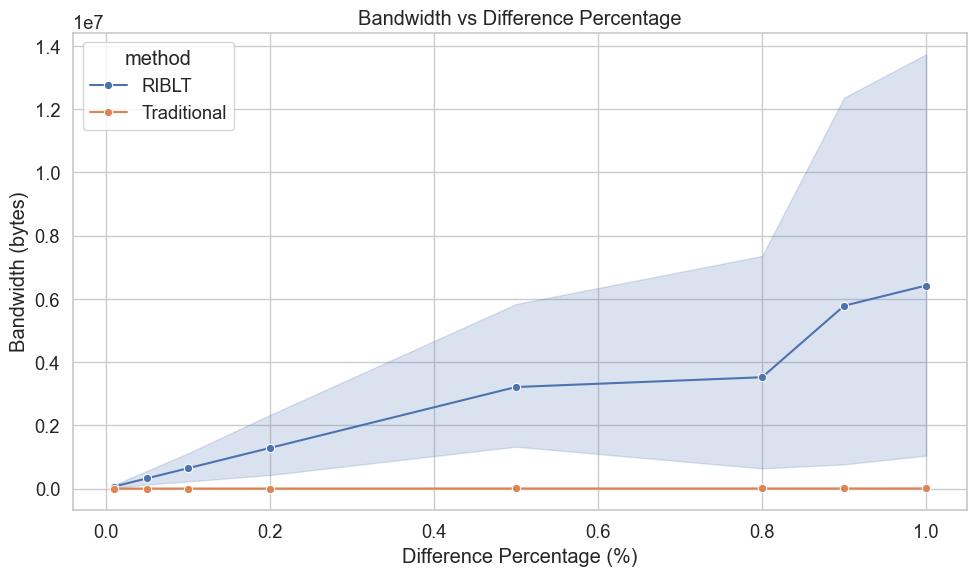

In [6]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x="diff",
    y="bandwidth",
    hue="method",
    marker="o"
)

plt.title("Bandwidth vs Difference Percentage")
plt.xlabel("Difference Percentage (%)")
plt.ylabel("Bandwidth (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

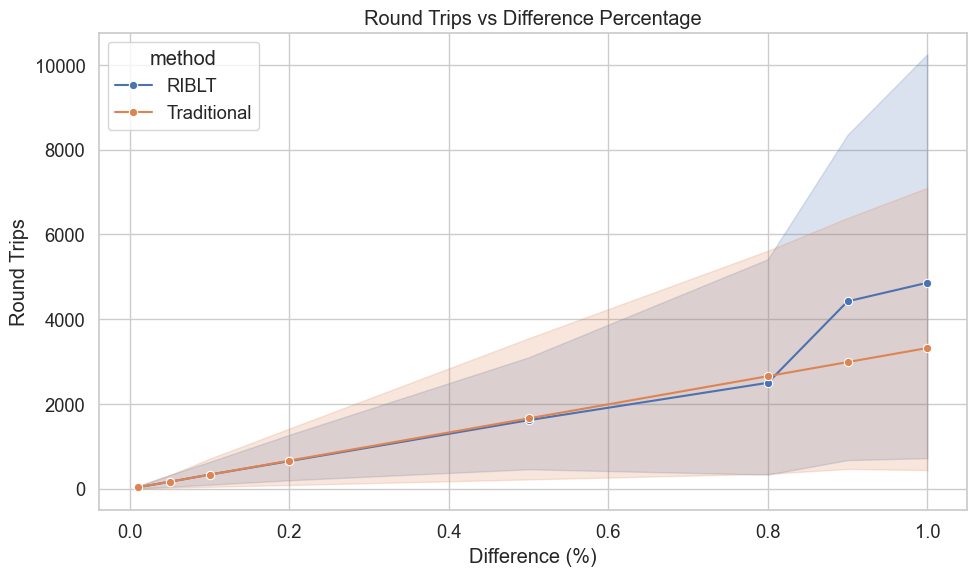

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="diff",
    y="roundTrips",
    hue="method",
    marker="o"
)

plt.title("Round Trips vs Difference Percentage")
plt.xlabel("Difference (%)")
plt.ylabel("Round Trips")
plt.grid(True)
plt.tight_layout()
plt.show()

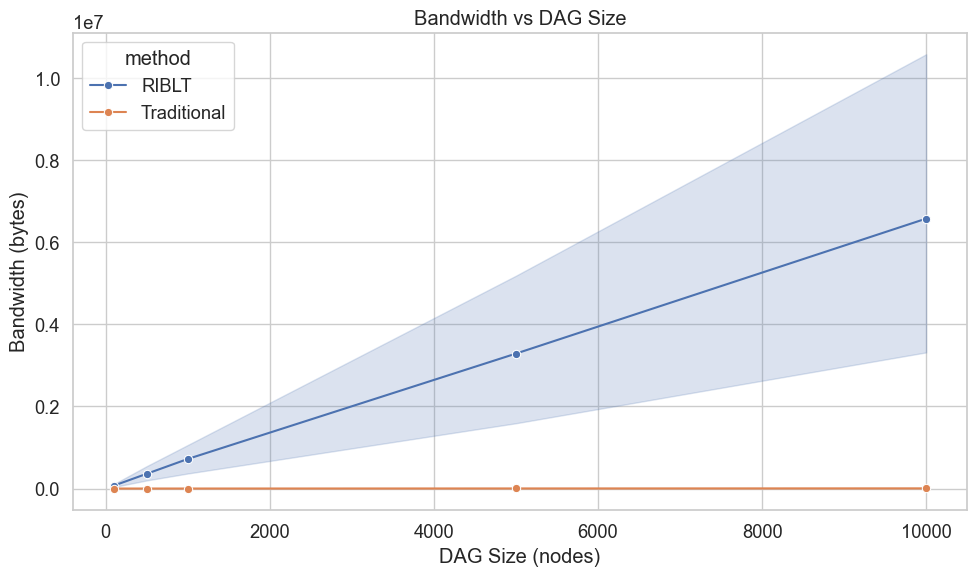

In [9]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x="DAG_size",
    y="bandwidth",
    hue="method",
    marker="o"
)

plt.title("Bandwidth vs DAG Size")
plt.xlabel("DAG Size (nodes)")
plt.ylabel("Bandwidth (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

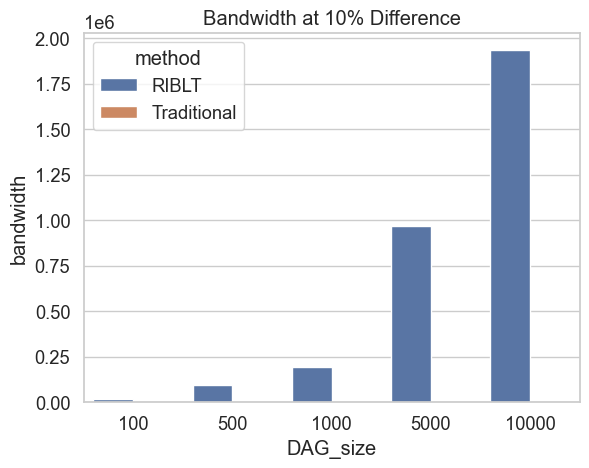

In [12]:
df_10 = df[df['diff'] == 0.1]

sns.barplot(
    data=df_10,
    x="DAG_size",
    y="bandwidth",
    hue="method"
)
plt.title("Bandwidth at 10% Difference")
plt.show()

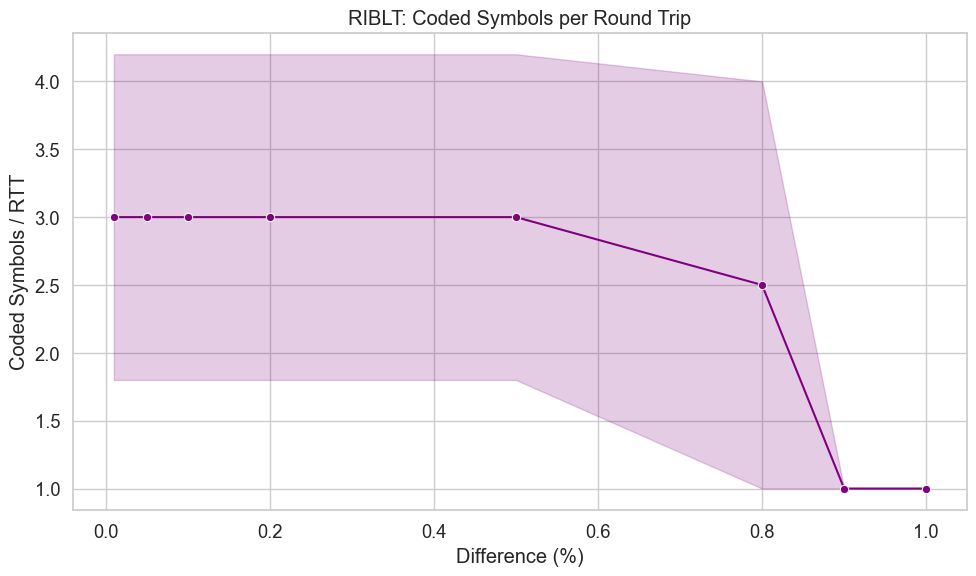

In [15]:
riblt_df = df[df["method"] == "RIBLT"]

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=riblt_df,
    x="diff",
    y="codedSymbolPerRoundTrip",
    marker="o",
    color="purple"
)

plt.title("RIBLT: Coded Symbols per Round Trip")
plt.xlabel("Difference (%)")
plt.ylabel("Coded Symbols / RTT")
plt.grid(True)
plt.tight_layout()
plt.show()

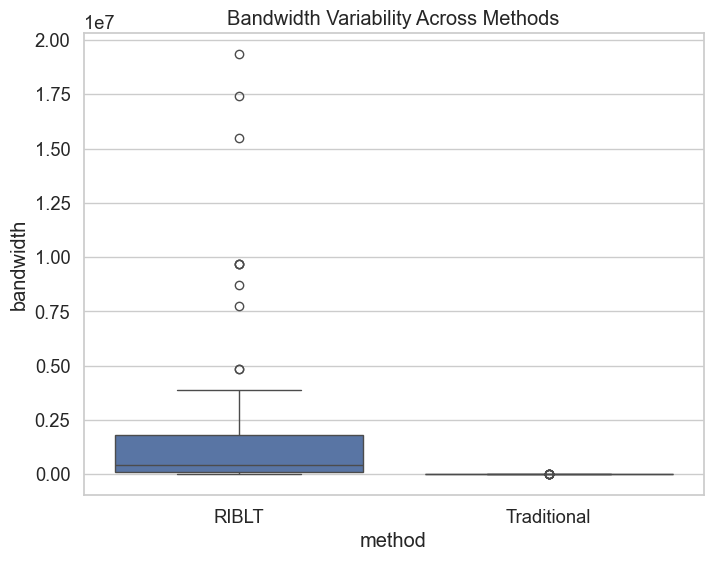

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="method",
    y="bandwidth"
)
plt.title("Bandwidth Variability Across Methods")
plt.show()

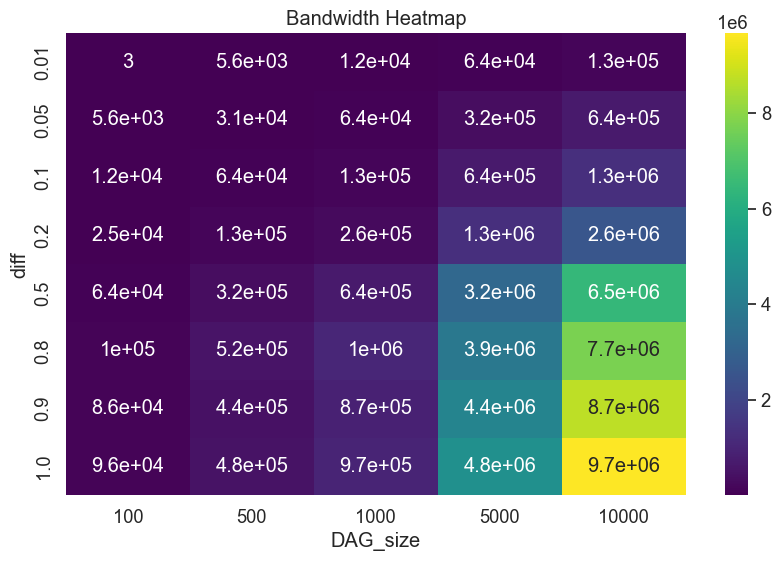

In [18]:
pivot = df.pivot_table(
    index="diff",
    columns="DAG_size",
    values="bandwidth",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="viridis")
plt.title("Bandwidth Heatmap")
plt.show()

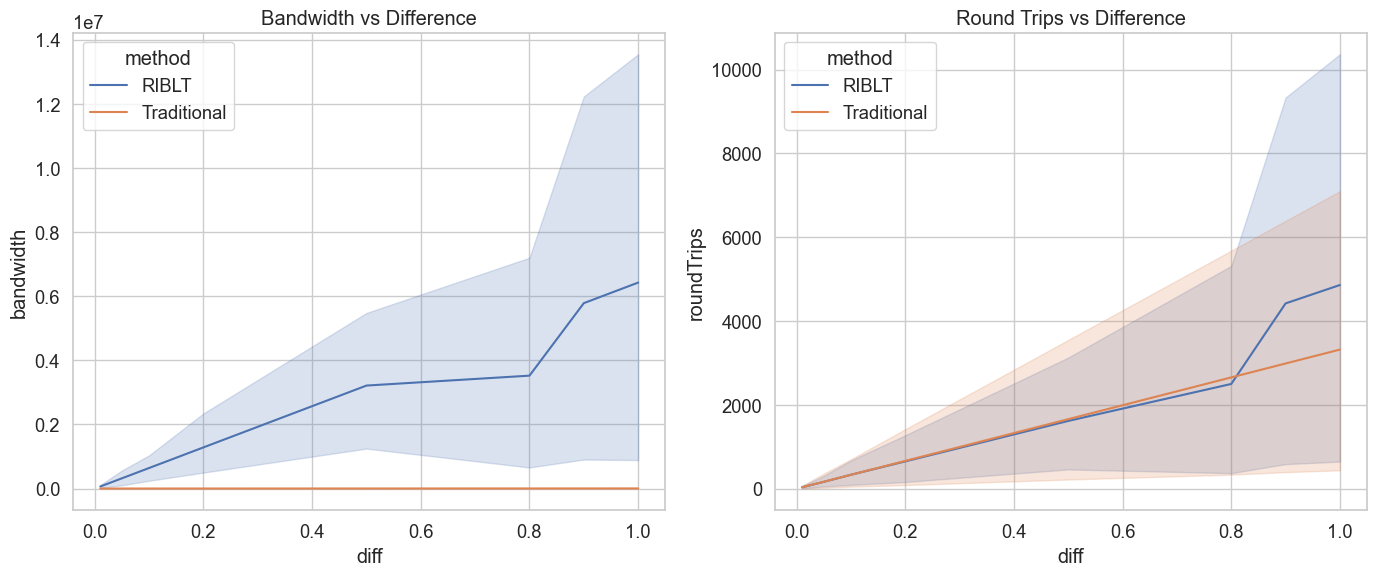

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=df, x="diff", y="bandwidth", hue="method", ax=ax[0])
sns.lineplot(data=df, x="diff", y="roundTrips", hue="method", ax=ax[1])

ax[0].set_title("Bandwidth vs Difference")
ax[1].set_title("Round Trips vs Difference")

plt.tight_layout()
plt.show()

C:\Users\Hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


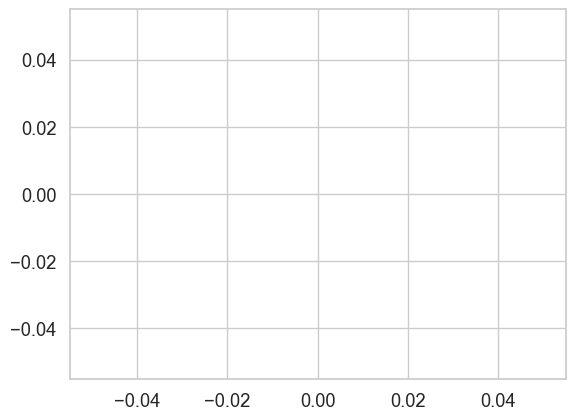